___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Visualizing Time Series Data

Let's go through a few key points of creating nice time series visualizations!

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../DATA/COST.csv',index_col='Date',parse_dates=True)

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-06,158.130005,158.149994,156.020004,158.059998,140.896622,2716900
2016-09-07,157.639999,157.869995,155.399994,155.639999,138.739395,2984100
2016-09-08,155.190002,155.490005,152.940002,153.470001,136.805038,2993100
2016-09-09,152.589996,152.789993,150.699997,150.699997,134.335831,2993900
2016-09-12,150.500000,151.990005,150.259995,151.690002,135.218338,2982400


In [6]:
# To show that dates are already parsed
df.index

DatetimeIndex(['2016-09-06', '2016-09-07', '2016-09-08', '2016-09-09',
               '2016-09-12', '2016-09-13', '2016-09-14', '2016-09-15',
               '2016-09-16', '2016-09-19',
               ...
               '2021-08-20', '2021-08-23', '2021-08-24', '2021-08-25',
               '2021-08-26', '2021-08-27', '2021-08-30', '2021-08-31',
               '2021-09-01', '2021-09-02'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

First we'll create a line plot that puts both <tt>'Close'</tt> and <tt>'Volume'</tt> on the same graph.<br>Remember that we can use <tt>df.plot()</tt> in place of <tt>df.plot.line()</tt>

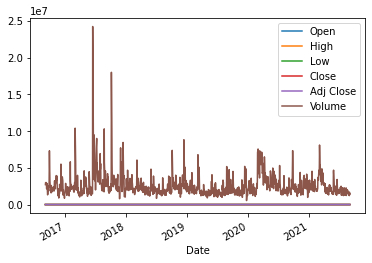

In [7]:
df.plot();

This isn't very helpful due to the difference in y-values, so we'll split them up.

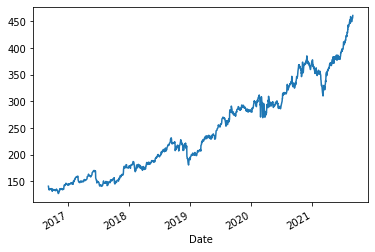

In [8]:
df['Adj Close'].plot();

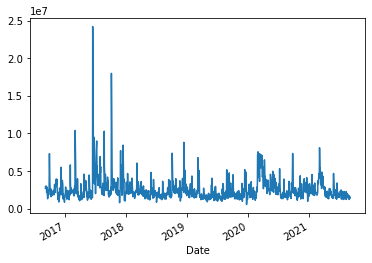

In [9]:
df['Volume'].plot();

# Time Series Plot Formatting

## X Limits
There are two ways we can set a specific span of time as an x-axis limit. We can plot a slice of the dataset, or we can pass x-limit values as an argument into <tt>df.plot()</tt>.

The advantage of using a slice is that pandas automatically adjusts the y-limits accordingly.

The advantage of passing in arguments is that pandas automatically tightens the x-axis. Plus, if we're also setting y-limits this can improve readability.

### Choosing X Limits by Slice:

<AxesSubplot:xlabel='Date'>

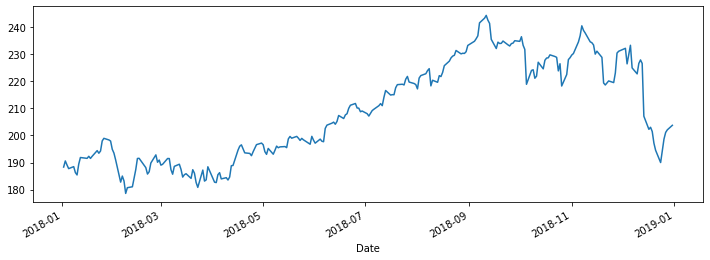

In [20]:
# Dates are separated by a colon:
df['Close']['2018-01-01':'2019-01-01'].plot(figsize=(12,4))

### Choosing X Limits by Argument:

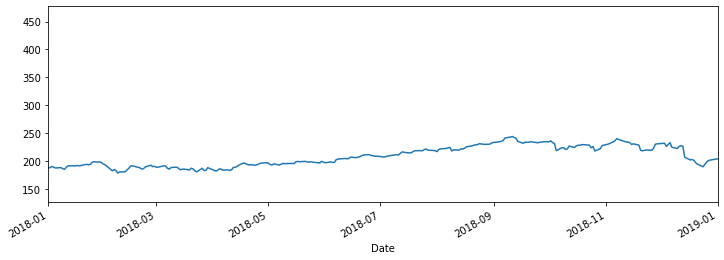

In [23]:
# Why is the y-axis so different?
# Because pandas first plotted the whole thing, then it narrowed 
# down the plot, unlike above, where we narrowed the df first!
df['Close'].plot(figsize=(12,4),xlim=['2018-01-01','2019-01-01']);

<div class="alert alert-info"><strong>NOTE:</strong> It's worth noting that the limit values do <em>not</em> have to appear in the index. Pandas will plot the actual dates based on their location in time.<br><br>Also, another advantage of slicing over arguments is that it's easier to include the upper/lower bound as a limit.<br>That is, <tt><font color=black>df['column']['2017-01-01':].plot()</font></tt> is easier to type than <tt><font color=black>df['column'].plot(xlim=('2017-01-01',df.index.max()))</font></tt></div>

Now let's focus on the y-axis limits to get a better sense of the shape of the data.<br>First we'll find out what upper and lower limits to use.

In [24]:
# FIND THE MINIMUM VALUE IN THE RANGE:
df.loc['2018-01-01':'2019-01-01']['Close'].min()

178.610001

In [25]:
# FIND THE MAXIMUM VALUE IN THE RANGE:
df.loc['2018-01-01':'2019-01-01']['Close'].max()

244.210007

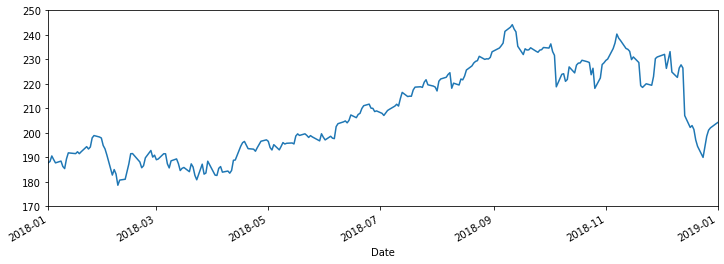

In [27]:
# PLUG THESE IN AS Y-LIMIT VALUES:
df['Close'].plot(figsize=(12,4),xlim=['2018-01-01','2019-01-01'],ylim=[170,250]);

<div class="alert alert-info"><strong>NOTE:</strong> Be careful when setting y-axis limits! Setting too narrow a slice can make graphs appear overly volatile. </div>

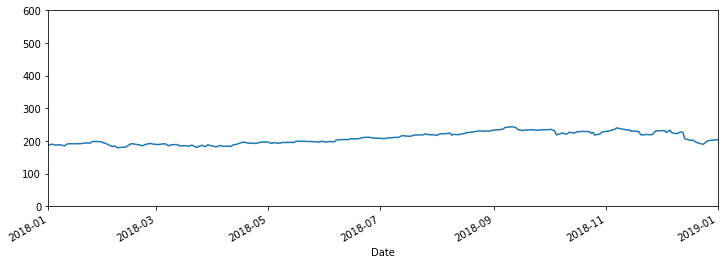

In [29]:
df['Close'].plot(figsize=(12,4),xlim=['2018-01-01','2019-01-01'],ylim=[0,600]);

## X Ticks
In this section we'll look at how to change the format and appearance of dates along the x-axis. To do this, we'll borrow a tool from <tt>matplotlib</tt> called <tt>dates</tt>.

In [18]:
from matplotlib import dates

### Set the spacing
The x-axis values can be divided into major and minor axes. For now, we'll work only with the major axis and learn how to set the spacing with <tt>.set_major_locator()</tt>.

<AxesSubplot:xlabel='Date'>

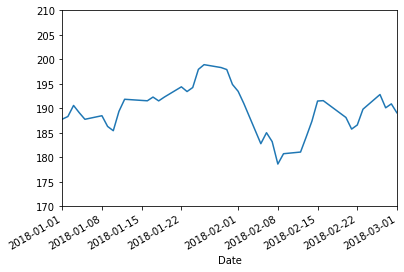

In [33]:
#Notice the strange "jump" in the middle due to the month change!
df['Close'].plot(xlim=['2018-01-01','2018-03-01'],ylim=(170,210))

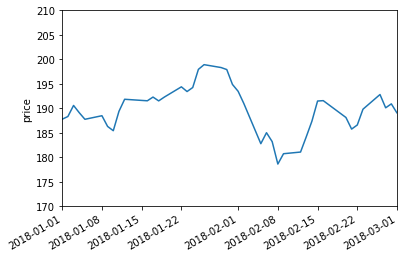

In [39]:
# you can remove "date" index name label
ax = df['Close'].plot(xlim=['2018-01-01','2018-03-01'],ylim=(170,210),
                     xlabel='',ylabel='price')

### Using Tick Locator  

In [48]:
from matplotlib import dates

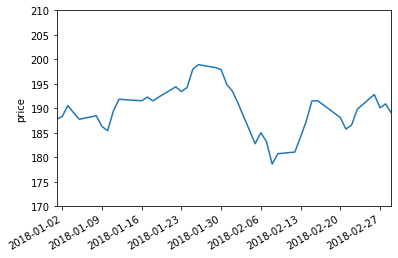

In [49]:
ax = df['Close'].plot(xlim=['2018-01-01','2018-03-01'],ylim=(170,210),
                     xlabel='',ylabel='price')

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.WeekdayLocator())

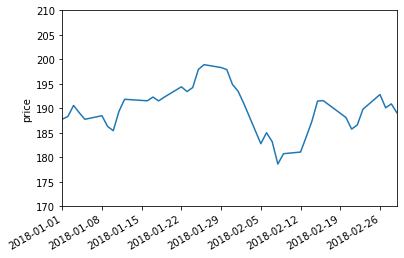

In [50]:
ax = df['Close'].plot(xlim=['2018-01-01','2018-03-01'],ylim=(170,210),
                     xlabel='',ylabel='price')

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

Notice that dates are spaced one week apart. The dates themselves correspond with <tt>byweekday=0</tt>, or Mondays.<br>
For a full list of locator options available from <tt>matplotlib.dates</tt> visit <a href='https://matplotlib.org/api/dates_api.html#date-tickers'>https://matplotlib.org/api/dates_api.html#date-tickers</a>

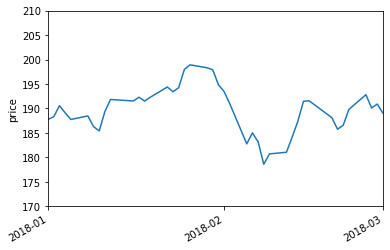

In [51]:
ax = df['Close'].plot(xlim=['2018-01-01','2018-03-01'],ylim=(170,210),
                     xlabel='',ylabel='price')

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.MonthLocator())

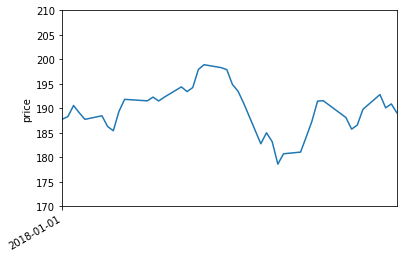

In [54]:
ax = df['Close'].plot(xlim=['2018-01-01','2018-03-01'],ylim=(170,210),
                     xlabel='',ylabel='price')

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.YearLocator()) # DayLocator()

## Formator

### Date Formatting
Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

In [55]:
# USE THIS SPACE TO EXPERIMENT WITH DIFFERENT FORMATS
from datetime import datetime
datetime(2001, 2, 3, 16, 5, 6).strftime("%A, %B %d, %Y  %I:%M:%S %p")

'Saturday, February 03, 2001  04:05:06 PM'

### Combine Locator with Formatter

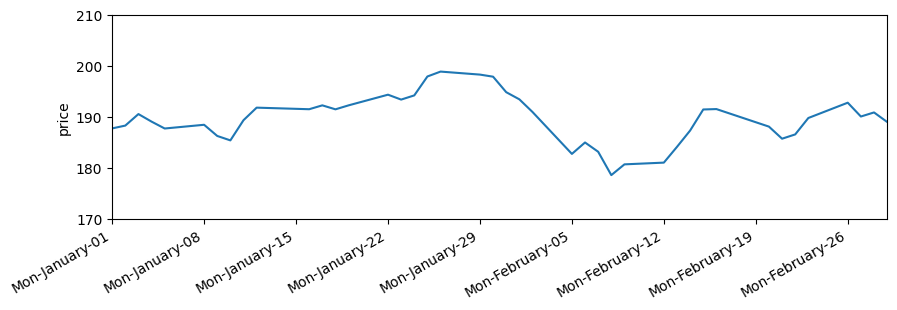

In [58]:
plt.figure(dpi=100,figsize=(10,3))
ax = df['Close'].plot(xlim=['2018-01-01','2018-03-01'],ylim=(170,210),
                     xlabel='',ylabel='price')

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

# ADD IN THE FORMATTER
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))

## Major vs. Minor Axis Values
All of the tick marks we've used so far have belonged to the major axis. We can assign another level called the <em>minor axis</em>, perhaps to separate month names from days of the month.

**DEFAULT PLOT**

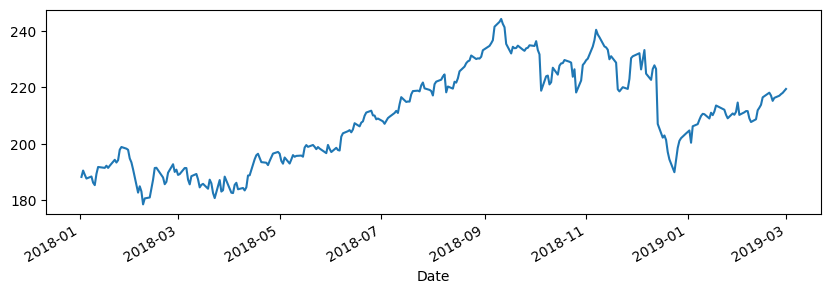

In [117]:
plt.figure(dpi=100,figsize=(10,3))
ax = df['Close']['2018-01-01':'2019-03-01'].plot()

**MAJOR TICK PLOT EDITS**

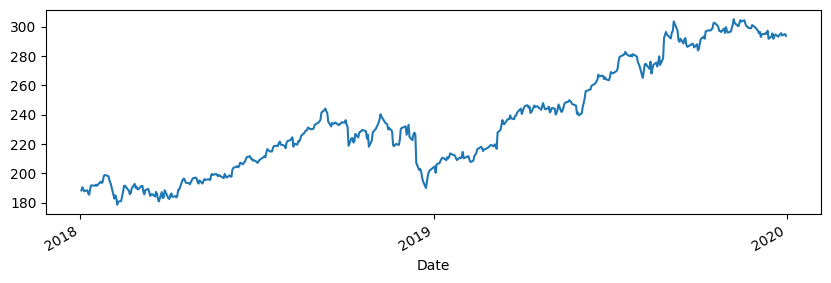

In [118]:
plt.figure(dpi=100,figsize=(10,3))
ax = df['Close']['2018-01-01':'2020-01-01'].plot()

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"))

**MAJOR AND MINOR TICK PLOT EDITS**

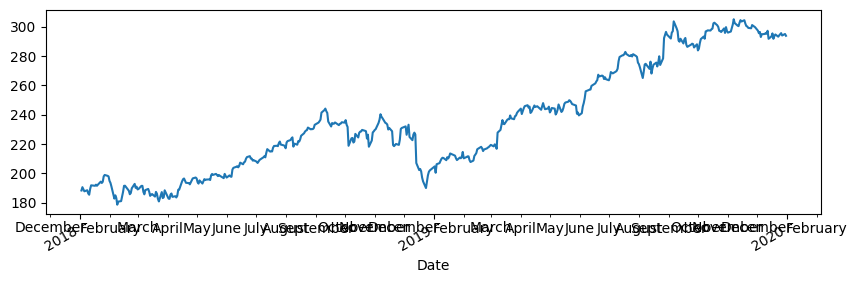

In [136]:
plt.figure(dpi=100,figsize=(10,3))
ax = df['Close']['2018-01-01':'2020-01-01'].plot()

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"))

# SET THE TICK LOCATOR AND FORMATTER FOR THE MINOR AXIS
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%B"))


#### Rotate Minor Ticks

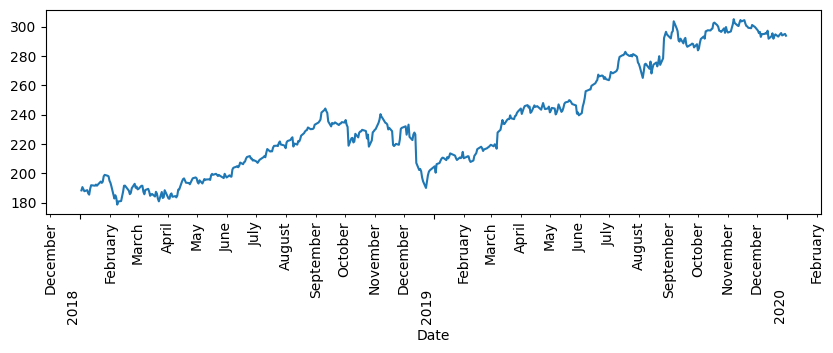

In [137]:
plt.figure(dpi=100,figsize=(10,3))
ax = df['Close']['2018-01-01':'2020-01-01'].plot()

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"))

# SET THE TICK LOCATOR AND FORMATTER FOR THE MINOR AXIS
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%B"))


# FURTHER EDITING TICK PROPERTIES

ax.tick_params(axis="x", which="major", rotation=90,pad=50)
ax.tick_params(axis="x", which="minor", rotation=90)

**Include Janurary instead of just Year on Major Tick**

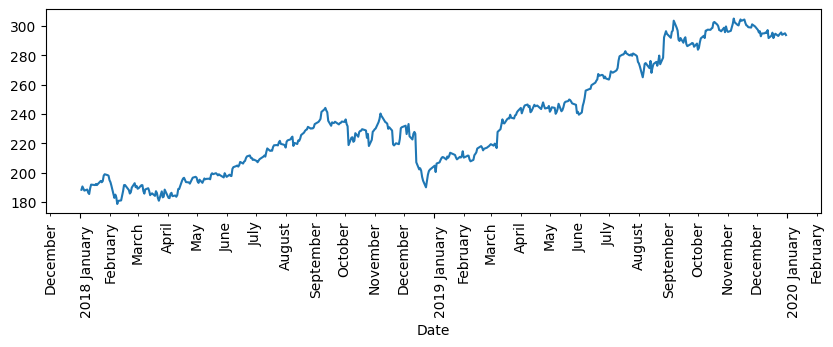

In [139]:
plt.figure(dpi=100,figsize=(10,3))
ax = df['Close']['2018-01-01':'2020-01-01'].plot()

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y %B"))

# SET THE TICK LOCATOR AND FORMATTER FOR THE MINOR AXIS
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%B"))


# FURTHER EDITING TICK PROPERTIES

ax.tick_params(axis="x", which="major",rotation=90, pad=5)
ax.tick_params(axis="x", which="minor",rotation=90)

# To get it exactly perfect is a lot more work:
# https://stackoverflow.com/questions/28615887/how-to-move-a-ticks-label-in-matplotlib
plt.xticks(ha='center');

## Adding Gridlines
We can add x and y axis gridlines that extend into the plot from each major tick mark.

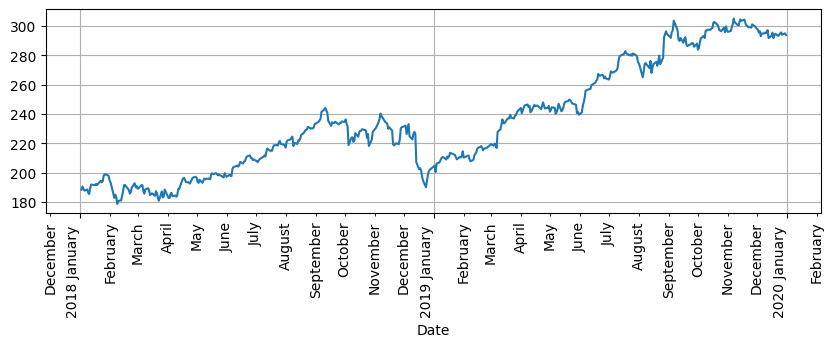

In [133]:
plt.figure(dpi=100,figsize=(10,3))
ax = df['Close']['2018-01-01':'2020-01-01'].plot()

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y %B"))

# SET THE TICK LOCATOR AND FORMATTER FOR THE MINOR AXIS
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%B"))


# FURTHER EDITING TICK PROPERTIES

ax.tick_params(axis="x", which="major",rotation=90, pad=5)
ax.tick_params(axis="x", which="minor",rotation=90)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

## Great job!